Alicia Sigmon, als333@pitt.edu, 10/04/2017

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
consumerKey= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumerSecret='XXXXXXXXXXXXXXXXXXXXXXXXXXXX'

# Creating Authentication
auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
                           consumer_secret=consumerSecret)
# Connecting to Twitter API with the authentication
api=tweepy.API(auth)

In [3]:
# Basic search for '#Australia'
result = api.search(q='%23Australia')  # "%23" == "#"
len(result)

10

In [4]:
# First tweet (in json format)
tweet = result[0]

# Analyzing the first tweet on all keys in the directory (except for key names beginning with "_")
for param in dir(tweet):
    if not param.startswith("_"):
        print("%s : %s\n" % (param, eval('tweet.'+param)))

author : User(_api=<tweepy.api.API object at 0x000002BBBE782128>, _json={'id': 567206965, 'id_str': '567206965', 'name': 'Mew', 'screen_name': 'Mew0629', 'location': 'Beijing', 'description': '', 'url': 'https://t.co/EslEB48Azr', 'entities': {'url': {'urls': [{'url': 'https://t.co/EslEB48Azr', 'expanded_url': 'http://wangzhihao.com.cn', 'display_url': 'wangzhihao.com.cn', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 26, 'friends_count': 106, 'listed_count': 0, 'created_at': 'Mon Apr 30 12:56:54 +0000 2012', 'favourites_count': 9, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 23, 'lang': 'zh-cn', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png'

In [5]:
# Turn off pretty print
%pprint

Pretty printing has been turned OFF


In [6]:
# Show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Individual keys
tweet.lang
tweet.text
tweet.retweet_count

# Why aren't the keys below outputting anything?
tweet.place
tweet.geo

'en'

'Hello, Apple. #applestore #sydney #australia @ Apple Store Sydney https://t.co/BXde8zXPQW'

0

Place(_api=<tweepy.api.API object at 0x000002BBBE782128>, id='0073b76548e5984f', url='https://api.twitter.com/1.1/geo/id/0073b76548e5984f.json', place_type='city', name='Sydney', full_name='Sydney, New South Wales', country_code='AU', country='Australia', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x000002BBBE782128>, type='Polygon', coordinates=[[[150.520928608, -34.1183470085], [151.343020992, -34.1183470085], [151.343020992, -33.578140996], [150.520928608, -33.578140996]]]), attributes={})

{'type': 'Point', 'coordinates': [-33.8596155, 151.2085887]}

In [8]:
#tweet.user
    # Looking at inidividual keys under user
tweet.user.location
tweet.created_at
tweet.user.name
tweet.user.screen_name

'Beijing'

datetime.datetime(2017, 10, 5, 3, 47, 21)

'Mew'

'Mew0629'

In [9]:
results = []

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23Australia').items(5000):
    results.append(tweet)

# Verify the number of items returned
print(len(results))

5000


In [10]:
# Converts given tweet list into Pandas DataFrame, consisting of values only

def toDataFrame(tweets):
    DataSet = pd.DataFrame()
    
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Pass the tweets list to 'toDataFrame' to create the DataFrame
DataSet = toDataFrame(results)

In [11]:
# Verify DataFrame:
DataSet.head(10)
DataSet.tail(5)

,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,915785455542591489,"Hello, Apple. #applestore #sydney #australia @...",0,Instagram,2017-10-05 03:47:21,567206965,Mew0629,Mew,2012-04-30 12:56:54,,26,106,Beijing,None
1,915785320167301120,RT @itsfuturewave: Good insight into the Austr...,1,RoundTeam,2017-10-05 03:46:49,740864424370638848,TrumpvsScience,Trump vs. Science,2016-06-09 11:13:38,Throw evidence at Trump's unscientific and der...,4991,3951,,Pacific Time (US & Canada)
2,915785312906780674,Something to track: #exceptional #heat in #Aus...,0,Twitter for iPhone,2017-10-05 03:46:47,882330443080531968,j_nalau,Johanna Nalau,2017-07-04 20:09:05,#Adaptation #Scientist @Griffith_Uni. #Decisio...,110,180,"Gold Coast, Queensland",None
3,915784963542237184,Good insight into the Australian #renewableene...,1,Twitter Web Client,2017-10-05 03:45:24,749224452001456132,itsfuturewave,futurewave,2016-07-02 12:53:24,Working towards the promotion and advancement ...,27,165,,Pacific Time (US & Canada)
4,915784886048391169,What do #investors want? Peace and security - ...,0,Hootsuite,2017-10-05 03:45:05,1321389338,FortisAP,Fortis AP,2013-04-01 23:55:07,Providing a full spectrum of accounting/taxati...,242,180,"Sydney, Australia",Pacific Time (US & Canada)
5,915784829194719234,RT @AzamaraVoyages: #Australia is calling and ...,1,Twitter for Android,2017-10-05 03:44:52,4226547732,CPATA15,CruisePlannersATA,2015-11-13 19:28:37,"I am Dena, from Cruise Planners in Marietta, G...",296,98,"Marietta, GA",Eastern Time (US & Canada)
6,915784621974945792,"HC / MC Driver - Eastern Creek, Huntingwood, S...",0,dlvr.it,2017-10-05 03:44:02,526093006,ZoomRecruit,Zoom Recruitment,2012-03-16 06:18:45,Zoom Recruitment & Training offers a full suit...,79,1,"VIC, Australia",New Caledonia
7,915784617013252098,#nowplaying on #Australia #Radio ♫ Elvis Presl...,0,SocialOomph,2017-10-05 03:44:01,820160734671695872,StevenB58668930,DJ Steven Bamo,2017-01-14 06:48:51,Hot Sounds Only for inq DJBamo930@gmail.com - ...,1626,77,,None
8,915784612919566336,#nowplaying on #Australia #Radio ♫ Elvis Presl...,0,SocialOomph,2017-10-05 03:44:00,820160905149153280,CarterRonald10,CMR ℙℝ☮ÐÜ℃✝ℑѺℵϟ,2017-01-14 06:49:32,#CMR Promotions,1800,85,"Fresno, CA",None
9,915784610583375872,#nowplaying on #Australia #Radio ♫ Patsy Cline...,0,SocialOomph,2017-10-05 03:44:00,820160934349914116,PhillipsLewis11,ℬαηḱ﹩ ℜαⅾ☤◎,2017-01-14 06:49:39,ℬαᾔкṧ øη $¢εηℯ #ℙґ◎ღ◎T☤☺ηαℓ,1929,71,"Virginia Beach, VA",None


,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
4995,915436630114131968,Very happy celebrations today at Spring-Dale G...,0,Twitter for Android,2017-10-04 04:41:15,151409528,CrLisaBradley,Cr Lisa Bradley,2010-06-03 10:17:31,"Cr Lisa Bradley is Councillor for Division 1, ...",803,269,"Logan, Queensland, Australia",Brisbane
4996,915436589492432896,RT @RT_com: #Australia's FM: We bought guns ba...,50,Twitter for iPad,2017-10-04 04:41:05,1202619470,istaff4you,❤️Carry-Okie ❤️,2013-02-21 01:18:10,"🇺🇸Jesus Saved Me - Military Mom - Love Jesus, ...",490,347,Okie Homie,Central Time (US & Canada)
4997,915436556076294144,RT @RT_com: #Australia's FM: We bought guns ba...,50,Twitter Web Client,2017-10-04 04:40:57,1405380116,jhl0749,jhl0749,2013-05-05 15:44:43,"이름은 간편히 J라고 불러주시면 됩니다!, 알티요정이라구욧☆/日本語はまだ勉強中です！...",977,1876,대한민국 / Korea / 韓國,Irkutsk
4998,915436432545714176,RT @RT_com: #Australia's FM: We bought guns ba...,50,Tweetbot for iΟS,2017-10-04 04:40:28,18363234,appleblossomBe,appleblossomB,2008-12-24 19:23:10,Rt's not necessarily endorsements . Surrounded...,1759,2514,Happy place,Dublin
4999,915436389973528576,RT @RT_com: #Australia's FM: We bought guns ba...,50,Twitter for iPhone,2017-10-04 04:40:18,3143629779,Bhorius,Bhorius,2015-04-07 12:21:34,"Man. Gamer. Part Time Nerd, Full Time Dad. You...",126,214,"Moscow, Russia",None


At first glance I seet a lot of tweets coming from the computer - is twitter usually used on the computer? 

It's kind of scary that we can see all of this information, especially seeing the data organized in a DataFrame

In [12]:
# Removing rows with "None" in "userTimezone"
DataSet = DataSet[DataSet.userTimezone.notnull()]

# Rows remaining
len(DataSet)

# Percentage of rows remaining
len(DataSet)/5000*100

# Lost about 1/3 of the tweets! :/

3171

63.42

In [13]:
# Count tweets per time zone for the top 10 time zones
tzs = DataSet['userTimezone'].value_counts()[:10]
print(tzs)

Pacific Time (US & Canada)    855
Sydney                        256
London                        202
Brisbane                      200
Melbourne                     184
Eastern Time (US & Canada)    169
Central Time (US & Canada)    110
Casablanca                     63
Madrid                         56
Amsterdam                      48
Name: userTimezone, dtype: int64


In [14]:
# Bar Graph of Time Zone data
plt.rcParams['figure.figsize'] = (15, 5)
tzs.plot(kind='bar')
# Graph Labeling
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #Australia')

Surprisingly, more people in the the Pacific Time Zone (US and Canada) are tweeting about Australia than people in Sydney, Australia. 

This is good to know, because it means the hashtag of a location is not a reliable way to find tweets from that location. 

In [15]:
sydney = DataSet.loc[DataSet['userLocation'] == 'Sydney', :] 
sydney.head(2)

brisbane = DataSet.loc[DataSet['userLocation'] == 'Brisbane',:]  
melbourne = DataSet.loc[DataSet['userLocation'] == 'Melbourne',:]
brisbane.head(2)
melbourne.head(2)


,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
173,915772585639534592,RT @RachelHollisArt: Finally emerging from the...,36,Twitter for Android,2017-10-05 02:56:13,1427606390,MayanAp0calypse,🏳️‍🌈 Mayan 🏳️‍🌈,2013-05-14 11:30:48,PhD student @Garvaninstitute |#Lezza | #Immuno...,533,491,Sydney,Sydney
206,915769788546162688,How does your performance compare to your cash...,0,Twitter Web Client,2017-10-05 02:45:06,69496477,CashFlowAdv,Cashflow Finance,2009-08-28 03:50:02,Cashflow Finance is a comprehensive provider o...,3110,3535,Sydney,Sydney


,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
299,915762351097311233,RT @Girrali: Fascist dictatorship allied with ...,2,Twitter for Android,2017-10-05 02:15:33,2733971311,43a6f0ce5dac4ea,Malcolm Ellis,2014-08-15 07:46:01,NO TPP SHENHUA ADANI CSG SAY NO TO AGENDA21 ...,3333,3662,Brisbane,Brisbane
836,915721392141697024,@cspyyc Our project in #Australia to combat th...,0,Twitter Web Client,2017-10-04 23:32:47,146675158,LeeCrockford,Lee Crockford,2010-05-22 02:06:42,Social Change | Mental Health | The Arts | Edu...,1461,1851,Brisbane,Brisbane


,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
1094,915700081533136896,RT @AnimalNsw2015: Pls #Qld &amp; #Australia t...,51,Twitter Web Client,2017-10-04 22:08:06,31352232,MarionGroves,Marion Groves,2009-04-15 05:50:47,"Independent technical, academic and general ed...",8091,6090,Melbourne,Melbourne
1273,915688252979298304,#Australia #guns #guncontrol https://t.co/xZlU...,0,Twitter for iPad,2017-10-04 21:21:06,32340937,MediaActive,Peter Clarke,2009-04-17 07:32:00,Former ABC broadcast journalist. Pioneered Aus...,2193,2246,Melbourne,Melbourne


There are a lot more locations in Australia than these 3!
Since I only pulled the top 3 locations, I'm probably missing a lot of tweets from other locations in Australia.
Also, tourists! These are merely tweets of people that are in these locations, not necessarily that live there!

In [16]:
# Look at friends and followers
friends_n_followers=DataSet.groupby('userTimezone')[['userFriendsCt','userFollowerCt']].mean()
# Sort to have the highest number of friends at the top
friends_n_followers=friends_n_followers.sort_values(['userFriendsCt'],ascending=False)
friends_n_followers.head(10)
len(friends_n_followers)

,userFriendsCt,userFollowerCt
userTimezone,,
Auckland,29049.875000,36574.250000
Belgrade,10578.750000,10973.125000
Eastern Time (US & Canada),10015.426036,19848.810651
Rome,9693.318182,29458.545455
Istanbul,9353.500000,12671.500000
Jakarta,8496.444444,26335.111111
Jerusalem,8005.333333,8419.833333
Baghdad,7511.666667,15428.166667
London,6187.742574,13189.549505


126

People in Auckland, New Zealand have a lot of friends!! 

Why are there so many time zones???
Is there something wrong here?

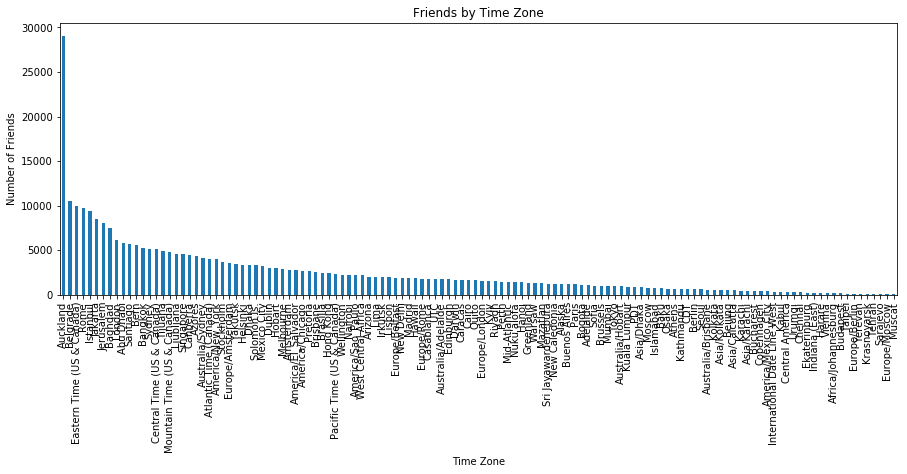

In [17]:
# Graph number of friends by time zone
friends_n_followers['userFriendsCt'].plot(kind = 'bar')
# Labeling
plt.title('Friends by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of Friends')
plt.show()

In [18]:
# figuring out how to sort friends_n_followers by number of friends
dir(friends_n_followers)
help(friends_n_followers.sort_values)

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis
    
    .. versionadded:: 0.17.0
    
    Parameters
    ----------
    by : str or list of str
        Name or list of names which refer to the axis items.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis to direct sorting
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default False
         if True, perform operation in-place
    kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
         Choice of sorting algorithm. See also ndarray.np.sort for more
         information.  `mergesort` is the only stable algorithm. For
         DataFrames

In [19]:
# The time zone seemed weird before - lets try this out on another DataFrame

# Look at friends and followers
sydney_friends=sydney.groupby('userTimezone')[['userFriendsCt','userFollowerCt']].mean()
# Sort to have the highest number of friends at the top
sydney_friends=sydney.sort_values(['userFriendsCt'],ascending=False)
sydney_friends.head(10)
len(sydney_friends)

,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
4931,915441150953062402,Timeout in #WatsonsBay #Sydney. Bring me back ...,7,Twitter for iPhone,2017-10-04 04:59:13,160047813,ohsunnymornings,Sylvia,2010-06-27 01:57:46,#SocialMediaCoach. #Australia's Rising Soci@l ...,326213,128482,Sydney,Sydney
886,915716874779770880,RT @ohsunnymornings: Bird's eye view of Sal Sa...,3,Twitter for iPhone,2017-10-04 23:14:50,160047813,ohsunnymornings,Sylvia,2010-06-27 01:57:46,#SocialMediaCoach. #Australia's Rising Soci@l ...,326213,128482,Sydney,Sydney
1564,915665370668785664,Bird's eye view of Sal Salis #NingalooReef via...,3,Hootsuite,2017-10-04 19:50:11,160047813,ohsunnymornings,Sylvia,2010-06-27 01:57:46,#SocialMediaCoach. #Australia's Rising Soci@l ...,326213,128482,Sydney,Sydney
4929,915441188974379008,RT @ohsunnymornings: Timeout in #WatsonsBay #S...,7,Twitter for iPhone,2017-10-04 04:59:22,160047813,ohsunnymornings,Sylvia,2010-06-27 01:57:46,#SocialMediaCoach. #Australia's Rising Soci@l ...,326213,128482,Sydney,Sydney
4936,915440744055181312,Real-time payments to be launched after Austra...,0,Twitter Web Client,2017-10-04 04:57:36,69496477,CashFlowAdv,Cashflow Finance,2009-08-28 03:50:02,Cashflow Finance is a comprehensive provider o...,3110,3535,Sydney,Sydney
206,915769788546162688,How does your performance compare to your cash...,0,Twitter Web Client,2017-10-05 02:45:06,69496477,CashFlowAdv,Cashflow Finance,2009-08-28 03:50:02,Cashflow Finance is a comprehensive provider o...,3110,3535,Sydney,Sydney
3260,915534960550748161,RT @healthmap: #Australia: #Measles alert spre...,2,Twitter for iPhone,2017-10-04 11:11:59,44559480,PalinComm,Palin Communications,2009-06-04 06:14:34,Where evidence-based PR drives change in the h...,3096,3244,Sydney,Sydney
2780,915565318017134592,RT @CBoyleImages: A cheeky little chap out enj...,9,TweetDeck,2017-10-04 13:12:36,305482111,Gordicans,Ian Gordicans,2011-05-26 09:01:22,"misanthropist, misophonia sufferer & guilty of...",2699,2232,Sydney,Sydney
4797,915447447391920128,"RT @abc730: Cecil Healy, #Australia's forgotte...",9,Twitter for iPhone,2017-10-04 05:24:14,272237235,SteveKellyABC,Steve Kelly,2011-03-26 03:23:39,@ABCNews hack. Tweeting #suicideprevention #au...,627,1869,Sydney,Sydney
1616,915661497312964608,Sun's up. #sunrise #cronulla #theshire #sydney...,0,Instagram,2017-10-04 19:34:47,17571208,AnthonyClarkAU,Anthony Clark,2008-11-23 09:55:49,NSW RFS Director of Corporate Communications. ...,2882,1164,Sydney,Sydney


19

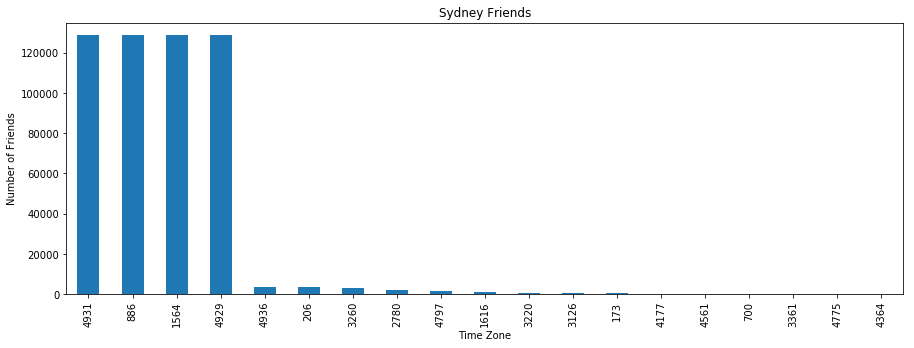

In [20]:
# Graph number of friends by time zone
sydney_friends['userFriendsCt'].plot(kind = 'bar')
# Labeling
plt.title('Sydney Friends')
plt.xlabel('Time Zone')
plt.ylabel('Number of Friends')
plt.show()

The Time Zones are DEFINITELY wrong. WHY???